## Visualization of California Housing Data
The California housing data is drawn from the 1990 U.S. Census and it contains 20640 entries with 9 features including one dependent feature for predicting house value. It is included in the sklearn library. The features and their meanings are:

- MedInc median income in block group
- HouseAge median house age in block group
- AveRooms average number of rooms per household
- AveBedrms average number of bedrooms per household
- Population block group population
- AveOccup average number of household members
- Latitude block group latitude
- Longitude block group longitude

The target variable is the median house value.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/iksinc/ML-Stuff/California.ipynb)

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [8]:
#Load data
from sklearn import datasets
calif = datasets.fetch_california_housing(as_frame=True)
calif_df= calif.frame
calif_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
calif_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


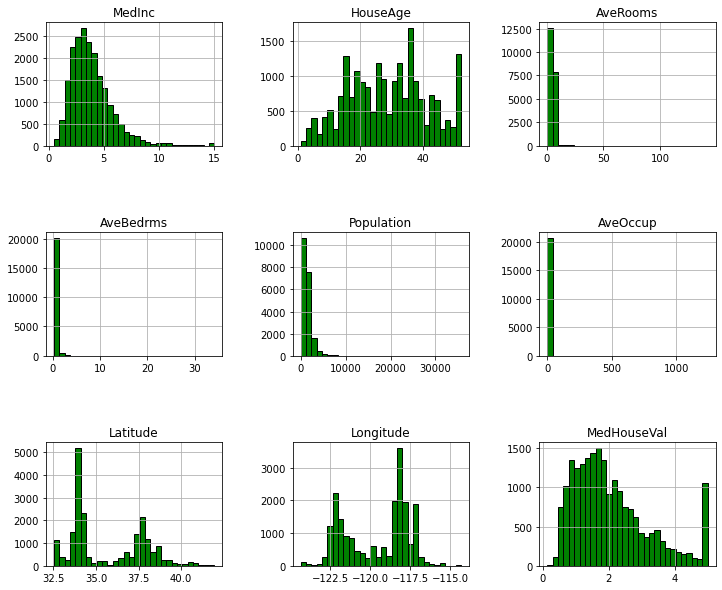

In [13]:
calif_df.hist(figsize=(12, 10), bins=30,color='green', edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

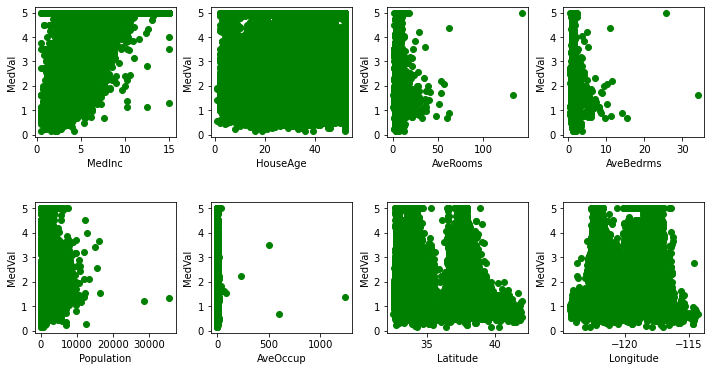

In [25]:
# Lets look at now the relationship between the target value and the independent features
features = calif_df.columns
fig, axs = plt.subplots(3, 5, figsize=(12,6))
for i in range(1,9):
    plt.subplot(2,4,i)
    plt.scatter(calif_df[features[i-1]],calif_df['MedHouseVal'], color='g')
    plt.xlabel(features[i-1])
    plt.ylabel('MedVal')
plt.subplots_adjust(wspace=0.25, hspace=0.50)
plt.show()

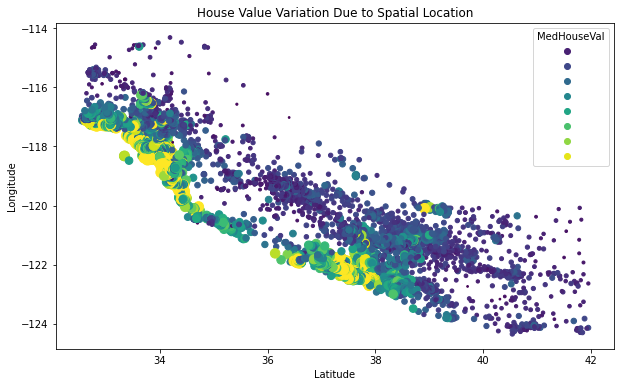

In [84]:
# Let's look at related pairwise features
fig, ax = plt.subplots(figsize=(10, 6))
scatter=plt.scatter(calif_df['Latitude'],calif_df['Longitude'], c = calif_df['MedHouseVal'],s= 20*calif_df['MedHouseVal'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('House Value Variation Due to Spatial Location')
plt.legend(handles=scatter.legend_elements()[0], title = 'MedHouseVal', loc='upper right')
plt.show()

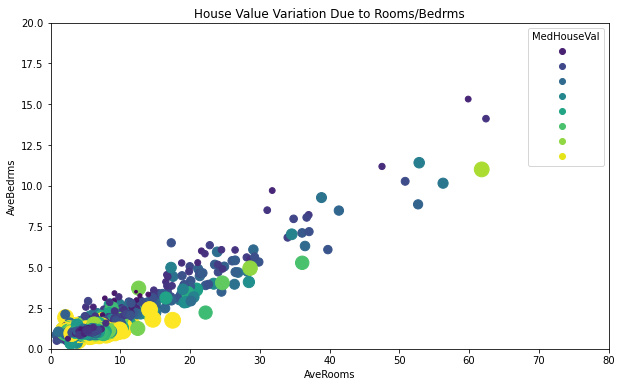

In [83]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0,80)
ax.set_ylim(0,20)
scatter=plt.scatter(calif_df['AveRooms'],calif_df['AveBedrms'], c = calif_df['MedHouseVal'],s= 50*calif_df['MedHouseVal'])
plt.xlabel('AveRooms')
plt.ylabel('AveBedrms')
plt.title('House Value Variation Due to Rooms/Bedrms')
plt.legend(handles=scatter.legend_elements()[0], title = 'MedHouseVal', loc='upper right')
plt.show()

In [78]:
# Lets revisit the Lat-Longitude plot again but with a small random set of data
rn = np.random.RandomState(7)
indices = rn.choice(np.arange(calif_df.shape[0]), size=200,replace=False)

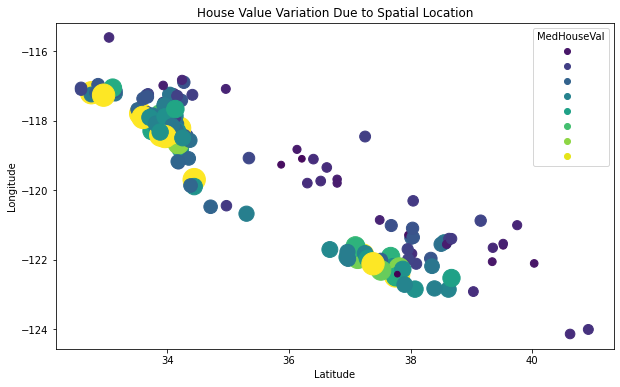

In [82]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter=plt.scatter(calif_df['Latitude'].iloc[indices],calif_df['Longitude'].iloc[indices], 
                    c = calif_df['MedHouseVal'].iloc[indices],s= 100*calif_df['MedHouseVal'].iloc[indices])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('House Value Variation Due to Spatial Location')
plt.legend(handles=scatter.legend_elements()[0], title = 'MedHouseVal', loc='upper right')
plt.show()

In [87]:
# Let's do a pairplot using the remaining four features. In this case, we will quantize the house value into 5 categories
qntz_MedHouseVal = pd.qcut(calif_df['MedHouseVal'].iloc[indices], 5, labels=False)

In [88]:
calif_df['MedHouseVal'].iloc[indices]=qntz_MedHouseVal

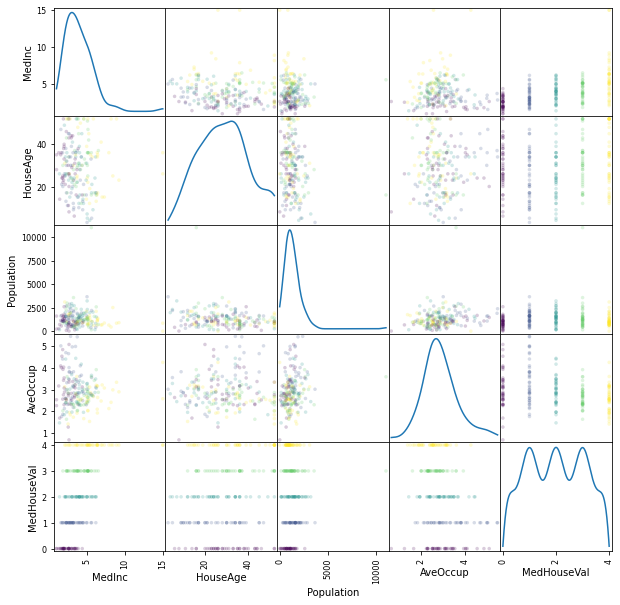

In [100]:
from pandas.plotting import scatter_matrix
scatter_matrix(calif_df[['MedInc','HouseAge','Population','AveOccup','MedHouseVal']].iloc[indices], alpha = 0.2, 
               c= calif_df['MedHouseVal'].iloc[indices],s=50,figsize = (10, 10), diagonal = 'kde');